In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

%matplotlib inline

In [ ]:
## Vamos prever a satisfação do Cliente (Target) com base em vários atributos preditores

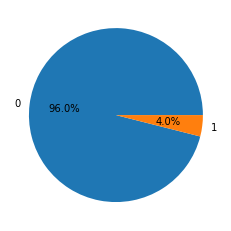

In [44]:
#Carregando o dataset, Removendo a coluna ID
data = pd.read_csv('santander-customer-satisfaction/train.csv')
data = data.drop(columns='ID')
#data.dtypes
#data.head()

#Verificando a distribuição da Target
pie = data['TARGET'].value_counts()
plt.pie(pie,labels=pie.index,autopct="%.1f%%")
plt.title('Distribuição da Variável Target')
plt.show()

#Correlação dos dado
cor = data.drop(columns=['TARGET']).corr(method = 'pearson')
correlated_features = set()

#Removendo features com alta correlação
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.8:
            colname = cor.columns[i]
            correlated_features.add(colname)
            
df = data.drop(columns=correlated_features)

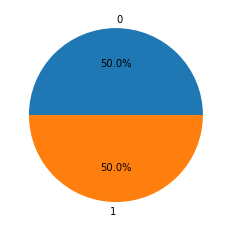

In [45]:
#Separando em Predictors e Target
X,y = df.drop(columns=['TARGET']),df['TARGET']

#ROSE - definindo a estratégia por minority
oversample = RandomOverSampler(sampling_strategy='minority')
#Aplicando o Over nos dados
X_over, y_over = oversample.fit_resample(X, y)

#Verificando Apos ROSE
(unique, counts) = np.unique(y_over,return_counts=True)
plt.pie(counts,labels=unique,autopct="%.1f%%")
plt.title('Distribuição da Variável Target - ROSE')
plt.show()

#X_over.describe()

In [46]:
#Substituindo observações muito elevadas
X_over = X_over.clip(lower=X_over.quantile(0.05), upper=X_over.quantile(0.95),axis=1)
#Verificando atributos que não tem variação
var = VarianceThreshold()
var.fit(X_over)

keep = var.get_support(indices=False)

#Removendo colunas desnecessárias
X_over = X_over.loc[:,keep]

X_over.describe()

,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var41_efect_ult1,ind_var5_0,ind_var5,ind_var37_cte,ind_var39_0,num_var4,num_op_var41_hace2,...,num_var22_ult1,num_var22_ult3,num_med_var45_ult3,num_op_var41_efect_ult1,num_var43_emit_ult1,num_var43_recib_ult1,num_var45_hace3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,var38
count,146024.00000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,...,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000,146024.000000
mean,35.85023,0.153590,36.176460,32.583794,0.942475,0.513566,0.073926,0.852613,0.884553,0.748336,...,0.491878,2.790055,2.931977,0.462581,0.185867,0.339006,2.692160,163.589031,24.578574,99889.180022
std,11.62209,0.660868,116.204106,113.357244,0.232843,0.499818,0.261652,0.354492,0.920677,2.312372,...,1.472981,5.011330,5.842586,1.497418,0.723227,0.949789,4.993666,448.857169,69.080165,47169.219394
min,23.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36142.620000
25%,25.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62184.030000
50%,33.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,96107.760000
75%,44.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,3.000000,45.000000,2.820000,117310.979016
max,61.00000,3.000000,479.637000,480.000000,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,...,6.000000,18.000000,21.000000,6.000000,3.000000,3.000000,18.000000,1843.243500,290.340000,220160.430000


In [47]:
#Aplicando preprocessamento
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X_over)
#Atribuindo como dataframe
X_scaled = pd.DataFrame(X_scaled,index=X_over.index,columns=X_over.columns)

#Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_over, test_size=0.33, random_state=1)

In [50]:
# Preparando a lista de modelos
models = []
models.append(('NB',GaussianNB()))
models.append(('LR', LogisticRegression(solver='newton-cg')))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))

Model: NB | Acuracy:  0.5876359259566697


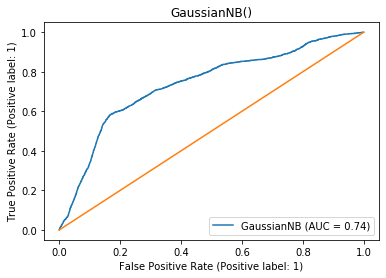

Model: LR | Acuracy:  0.7365941728231095


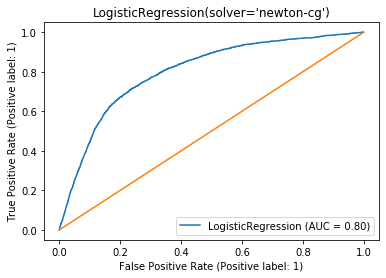

Model: LDA | Acuracy:  0.731738192081016


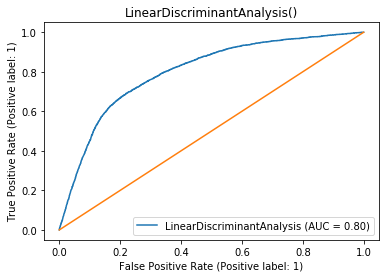

Model: CART | Acuracy:  0.9580185938407902


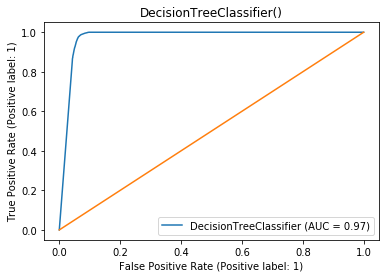

Model: RF | Acuracy:  0.9687474059931933


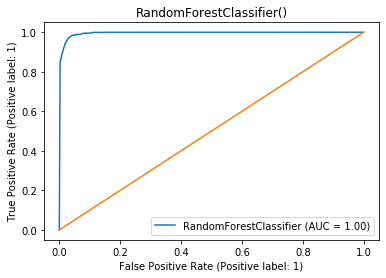

In [66]:
#Loop for treinar os modelos e coletar seus resultados
result = []
names = []
for name, model in models:
    model.fit(X_train,y_train)
    result.append(model.score(X_test, y_test))
    names.append(name)
    print('Model:',name,'| Acuracy: ',model.score(X_test, y_test))
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1])
    plt.title(model)
    plt.show()

In [ ]:
# Os modelos que apresentaram a melhor performance foram os de árvore
# O modelo selecionado para fazer o deploy foi o RandomForest por apresentar maior AUC